# Clustering Ghanaian households based on their expenditure patterns

### 1.2 Extract, Transform, Load (ETL)

In this notebook, we will transform the data from the source into a shape suitable for analytics. First of all, we mention that the dataset is in CSV format and as such we do not perform de-normalization. Some of the task we will perform in this ETL document includes merging, checking data types for each column, correlation analysis, filtering, sorting, splitting, relacements, etc.

#### MERGING DATA

In [1]:
import pandas as pd

In the exercise below, we will merge the 12 separate datasets

Import demographics data which is already downloaded

In [5]:
basic_info = pd.read_csv('BASIC_INFO.csv')

In [6]:
basic_info.head(3)

,country,region,hid,clust,nh,loc2,loc5,loc7,survemo,surveyr,eqsc,hhsize,WTA_S,WTA_S_HHSIZE,rururb
0,Ghana,Western,70001/01,70001.0,1.0,Urban,Other Urban,Urban Coastal,10.0,2016.0,0.76,1.0,482.56895,482.5689,Urban
1,Ghana,Western,70001/02,70001.0,2.0,Urban,Other Urban,Urban Coastal,10.0,2016.0,5.59,7.0,482.56895,3377.9830,Urban
2,Ghana,Western,70001/03,70001.0,3.0,Urban,Other Urban,Urban Coastal,10.0,2016.0,1.00,1.0,482.56895,482.5689,Urban


the data above contains the demographics of the households but we do not need all them, so we will select only some columns - hid:household id, region:region of household, rururb:rural or urban

In [8]:
basic_info2 = basic_info[['hid','region','rururb']]

In [9]:
basic_info2.head(2)

,hid,region,rururb
0,70001/01,Western,Urban
1,70001/02,Western,Urban


Next, we will merge the data above with the various data files containing the 12 expenditure compnents. Some of the files contains just a subset of the households, and so we will use the households that reported values for all 12 components.  

import food expenditure data

In [10]:
exp_food = pd.read_csv('01_GHA_EXPFOOD.csv')

In [11]:
b1 = pd.merge(basic_info2, exp_food, how='inner', on='hid') # we are merging on the household id.


import alcohol expenditure data

In [13]:
exp_alch = pd.read_csv('02_GHA_EXPALCH.csv')

In [14]:
b2 = pd.merge(b1, exp_alch, how='inner', on='hid') # we are merging on the household id.


import clothing expenditure data

In [15]:
exp_cl = pd.read_csv('03_GHA_EXPCLTH.csv')
b3 = pd.merge(b2, exp_cl, how='inner', on='hid') # we are merging on the household id.


import housing expenditure data

In [16]:
exp_hs = pd.read_csv('04_GHA_EXPHOUS.csv')
b4 = pd.merge(b3, exp_hs, how='inner', on='hid') # we are merging on the household id.


import furniture expenditure data

In [17]:
exp_fur = pd.read_csv('05_GHA_EXPFURN.csv')
b5 = pd.merge(b4, exp_fur, how='inner', on='hid') # we are merging on the household id.


import health expenditure data

In [18]:
exp_hl = pd.read_csv('06_GHA_EXPHLTH.csv')
b6 = pd.merge(b5, exp_hl, how='inner', on='hid') # we are merging on the household id.


import transport expenditure data

In [19]:
exp_tr = pd.read_csv('07_GHA_EXPTRSP.csv')
b7 = pd.merge(b6, exp_tr, how='inner', on='hid') # we are merging on the household id.


import communication expenditure data

In [20]:
exp_cm = pd.read_csv('08_GHA_EXPCMNQ.csv')
b8 = pd.merge(b7, exp_cm, how='inner', on='hid') # we are merging on the household id.


import recreation expenditure data

In [21]:
exp_re = pd.read_csv('09_GHA_EXPRCRE.csv')
b9 = pd.merge(b8, exp_re, how='inner', on='hid') # we are merging on the household id.


import education expenditure data

In [22]:
exp_ed = pd.read_csv('10_GHA_EXPEDUC.csv')
b10 = pd.merge(b9, exp_ed, how='inner', on='hid') # we are merging on the household id.


import hotel and restaurant expenditure data

In [23]:
exp_ht = pd.read_csv('11_GHA_EXPHOTL.csv')
b11 = pd.merge(b10, exp_ht, how='inner', on='hid') # we are merging on the household id.


import miscellaneous expenditure data

In [24]:
exp_mis = pd.read_csv('12_GHA_EXPMISC.csv')
b12 = pd.merge(b11, exp_mis, how='inner', on='hid') # we are merging on the household id.


In [25]:
df = b12

Let's view the data

In [26]:
df.head()

,hid,region,rururb,TOTFOOD,TOTALCH,TOTCLTH,TOTHOUS,TOTFURN,TOTHLTH,TOTTRSP,TOTCMNQ,TOTRCRE,TOTEDUC,TOTHOTL,TOTMISC
0,70001/02,Western,Urban,9437.439453,0.0,1978.0,2569.800049,1128.790039,182.500000,2248.399902,138.899994,55.250000,1481.5,0.0,1081.459961
1,70001/05,Western,Urban,6990.479980,0.0,906.0,10808.799805,1693.709961,21.900000,192.500000,370.399994,50.000000,5079.0,0.0,260.200012
2,70001/06,Western,Urban,3079.566895,0.0,442.0,1240.099976,379.599976,29.200001,0.000000,146.000000,21.900002,827.0,0.0,932.660034
3,70001/07,Western,Urban,6542.259766,0.0,2435.0,1200.800049,580.959961,29.200001,2579.500000,567.700012,12.500000,1198.0,0.0,898.919983
4,70001/09,Western,Urban,15067.199219,0.0,1439.0,1802.199951,1439.250000,2219.199951,1022.000000,627.799988,69.599998,2010.0,0.0,1007.919983


lets also add a column for total expiture accross all 12 expenditure components. Lets first remove numerical columns

#### GENERATING TOTAL EXPENDITURE COLUMN

In [46]:
col_list= list(df)
col_list.remove('hid')
col_list.remove('region')
col_list.remove('rururb')

In [34]:
df['TOTAL_EXP'] = df[col_list].sum(axis=1)

In [35]:
df.head(2)

,hid,region,rururb,TOTFOOD,TOTALCH,TOTCLTH,TOTHOUS,TOTFURN,TOTHLTH,TOTTRSP,TOTCMNQ,TOTRCRE,TOTEDUC,TOTHOTL,TOTMISC,TOTAL_EXP
0,70001/02,Western,Urban,9437.439453,0.0,1978.0,2569.800049,1128.790039,182.5,2248.399902,138.899994,55.25,1481.5,0.0,1081.459961,20302.039398
1,70001/05,Western,Urban,6990.479980,0.0,906.0,10808.799805,1693.709961,21.9,192.500000,370.399994,50.00,5079.0,0.0,260.200012,26372.989752


#### CHECKING DATA TYPES

In [47]:
%matplotlib

Using matplotlib backend: agg


check data type for each column to make sure the data is in the right format

In [48]:
print(df.dtypes)

hid           object
region        object
rururb        object
TOTFOOD      float64
TOTALCH      float64
TOTCLTH      float64
TOTHOUS      float64
TOTFURN      float64
TOTHLTH      float64
TOTTRSP      float64
TOTCMNQ      float64
TOTRCRE      float64
TOTEDUC      float64
TOTHOTL      float64
TOTMISC      float64
TOTAL_EXP    float64
dtype: object


checking for missing values

In [49]:
df.isna().sum()

hid          0
region       0
rururb       0
TOTFOOD      0
TOTALCH      0
TOTCLTH      0
TOTHOUS      0
TOTFURN      0
TOTHLTH      0
TOTTRSP      0
TOTCMNQ      0
TOTRCRE      0
TOTEDUC      0
TOTHOTL      0
TOTMISC      0
TOTAL_EXP    0
dtype: int64

As we can see above, the data has no missing values

let's also check the number of categories in the categorical variables. We see that the data is fairly distributed across the 10 regions of Ghana

In [50]:
df.region.value_counts()

Upper East       1086
Northern          998
Upper West        977
Ashanti           917
Volta             905
Central           837
Brong Ahafo       823
Eastern           815
Western           792
Greater Accra     772
Name: region, dtype: int64

In [51]:
df.rururb.value_counts()

Rural    5371
Urban    3551
Name: rururb, dtype: int64

we also see that the sample has more rural respondents than urban respondents

Next, we will describe each column. Thus, find the mean, std, min, etc for each column. 

In [52]:
df.describe()

,TOTFOOD,TOTALCH,TOTCLTH,TOTHOUS,TOTFURN,TOTHLTH,TOTTRSP,TOTCMNQ,TOTRCRE,TOTEDUC,TOTHOTL,TOTMISC,TOTAL_EXP
count,8922.000000,8922.000000,8922.000000,8922.000000,8922.000000,8922.000000,8922.000000,8922.000000,8922.000000,8922.000000,8922.000000,8922.000000,8922.000000
mean,5471.356412,75.792805,1018.662441,1096.321677,511.927836,91.094001,1045.463037,293.325670,204.334484,1931.279085,11.519222,320.666507,12071.743176
std,4560.189923,268.723522,1179.589452,2466.529863,662.724481,338.443163,3150.340309,562.418323,688.076699,3904.026908,513.625488,783.635398,11311.524793
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,130.500000
25%,2557.980835,0.000000,340.000000,120.000000,171.869995,0.000000,37.500000,20.000000,3.750000,249.125000,0.000000,7.300000,5377.969887
50%,4423.799805,0.000000,690.500000,589.392883,340.160004,0.000000,299.399994,125.000000,36.875000,871.500000,0.000000,116.800003,9309.149873
75%,7022.235107,0.000000,1310.750000,1447.225037,628.024979,58.400002,957.759995,380.312492,127.500000,2290.000000,0.000000,350.000000,15050.508835
max,86967.820312,6847.399902,32394.000000,142304.281250,15550.000000,10307.599609,70056.000000,27087.000000,27811.849609,141000.000000,46720.000000,37148.800781,232614.699219


let's plot the mean for each column

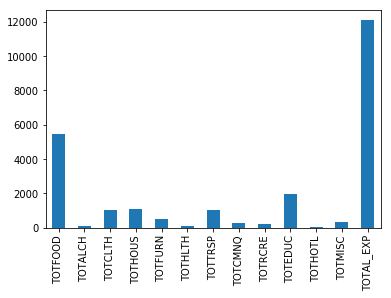

In [56]:
row = df.describe().iloc[1]
row.plot(kind='bar')

we see that on average, expenditure on food is the highest among the 12 expenditure categories. This is followed by expenditure on education

#### CHECKING CORRELATION BETWEEN NUMERICAL VARIABLES

In [61]:
import seaborn as sns
import numpy as np

          TOTFOOD   TOTALCH   TOTCLTH   TOTHOUS   TOTFURN   TOTHLTH   TOTTRSP  \
TOTFOOD  1.000000  0.059236  0.414471  0.215608  0.446896  0.111360  0.246756   
TOTALCH  0.059236  1.000000  0.017349 -0.026565  0.044424  0.045401  0.076806   
TOTCLTH  0.414471  0.017349  1.000000  0.259892  0.490700  0.132225  0.259086   
TOTHOUS  0.215608 -0.026565  0.259892  1.000000  0.216682  0.059676  0.159905   
TOTFURN  0.446896  0.044424  0.490700  0.216682  1.000000  0.168044  0.368949   
TOTHLTH  0.111360  0.045401  0.132225  0.059676  0.168044  1.000000  0.086065   
TOTTRSP  0.246756  0.076806  0.259086  0.159905  0.368949  0.086065  1.000000   
TOTCMNQ  0.360874  0.049442  0.351978  0.191141  0.373025  0.082302  0.423987   
TOTRCRE  0.207255  0.065860  0.215472  0.107751  0.249713  0.109526  0.161919   
TOTEDUC  0.265572 -0.019162  0.272300  0.190763  0.349498  0.040523  0.320321   
TOTHOTL  0.012442 -0.000849  0.008143  0.008299  0.014170 -0.000011  0.024985   
TOTMISC  0.308585  0.018740 

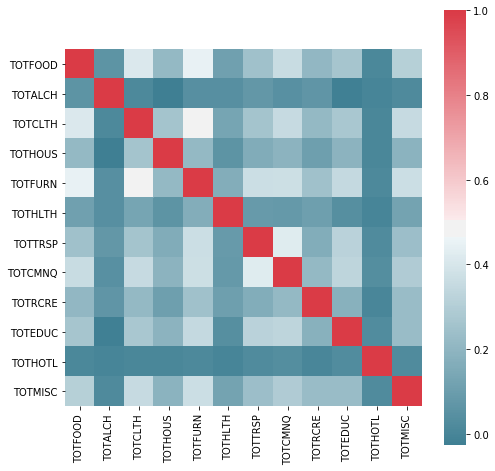

In [62]:
X = df.iloc[:, 3:15]
f, ax = plt.subplots(figsize=(8, 8))
corr = X.corr()
print(corr)
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)




We see that the correlation between the variables are lower than 0.5. Hence, we will use all the variables in the clustering analysis. Moreover this indicates that there is no need for PCA

Plotting histograms for the various columns

<Figure size 432x288 with 0 Axes>

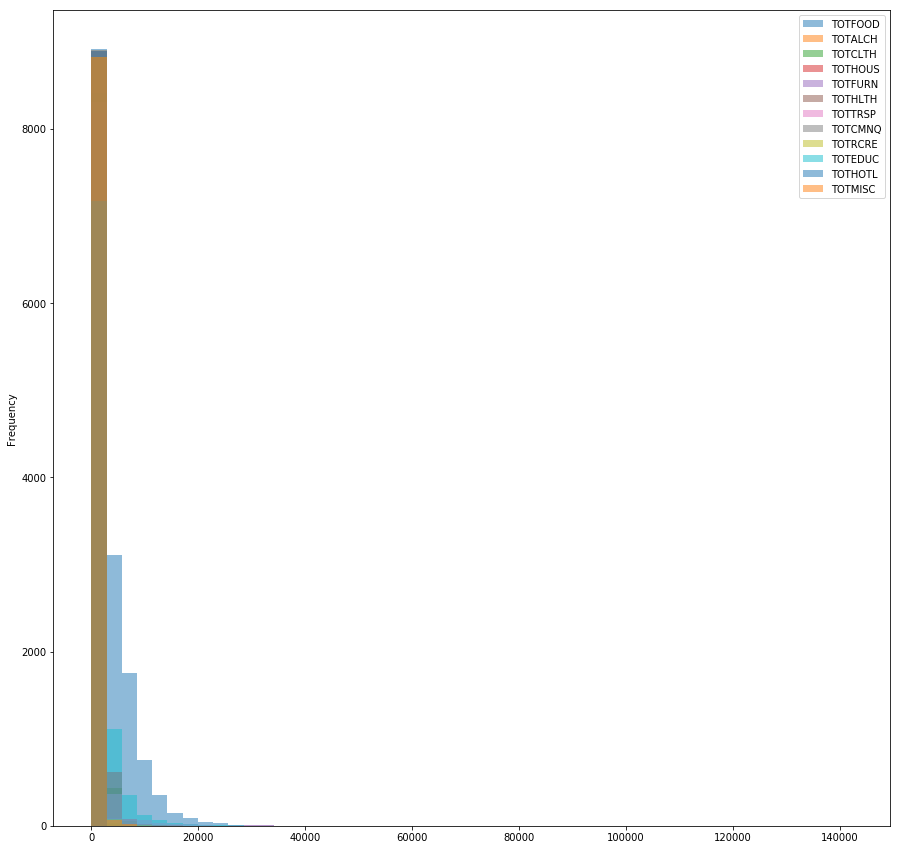

In [76]:
plt.figure();

X.plot.hist(alpha=0.5,figsize=(15,15),bins=50)

Although it is difficult to see the histogram for some of the variables, the plot above suggests that there are outliers in the data

In the figure below, we plot the histogram separately for each column on a subplot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f158bce26d8>,
      dtype=object)

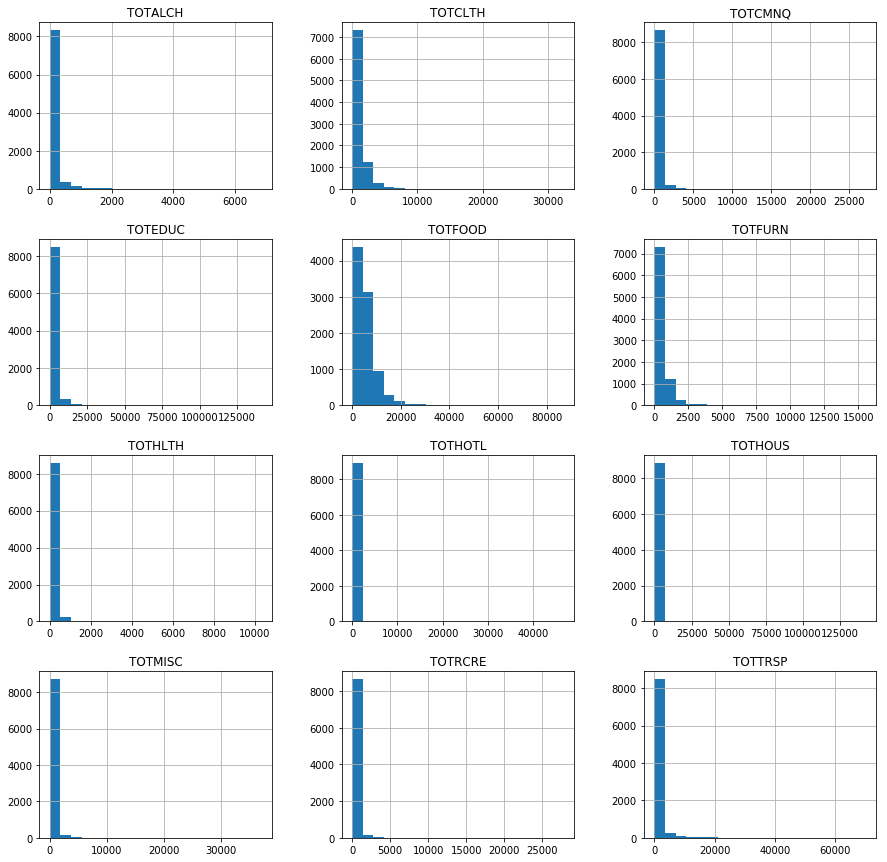

In [75]:
X.hist(figsize=(15,15), bins = 20)

Next, lets examine the presence of outliers in the data using box plot

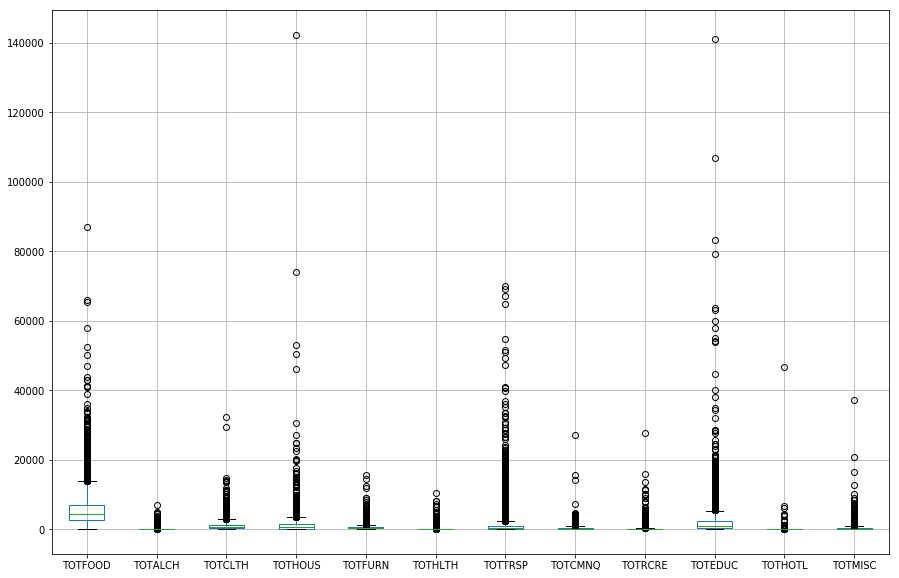

In [77]:
boxplot = X.boxplot(figsize=(15,10))

The figure above indicates that there are outliers in all the variables. We will then use a clustering algorithm that is more robust to outliers such as K-median or DBSCAN. Specifically we will use DBSCAN for this project. 

#### REMOVING COLUMNS

Also we will drop the the variable TOTHOTL - Expenditure on Hotels and restaurants  because it contains a lot similar values for the data points. Only 60  data points are non-zero, indicating a high level of stability in the data. And hence the need to drop it. 

In [86]:
condition = df.TOTHOTL != 0 
print('number of non zeros in the TOTHOTL column is', len(df[condition]))
stability = len(df[condition])/len(df)
print('stability in the TOTHOTL column is about', stability*100, 'percent')

number of non zeros in the TOTHOTL column is 60
stability in the TOTHOTL column is about 0.6724949562878278 percent


In [81]:
df2 = df.drop(columns='TOTHOTL')

In [82]:
X2 = X.drop(columns='TOTHOTL')

Now, we will save the final data to a file to be used on the next phase of this project

In [88]:
df2.to_csv('final_capstone_project_data.csv')

In [89]:
X2.to_csv('final_capstone_project_data_X.csv')

RANGE:
We keep the original ranges for all the variables for now. At the ETL stage, we will transform the columns in the data set.

FILTERING:
We do not filter subsets of the data at this stages as the data seems fine

SORTING:
No sorting is done

REPLACEMENT AND SPLITTING:
No replacement and splitting was done